# 03_announcement_days

Xolani Sibande (April 2025)

Importing packages:

In [ ]:
library(here)


here() starts at /Users/xolanisibande-dev/Papers/US_EM_MPS_spillover

Importing functions:

In [ ]:
source(here("notebooks", "functions", "fx_plot.R"))


Importing data:

In [ ]:
yields_tbl <- read_rds(here("notebooks","outputs", "artifacts_yields_data.rds")) |> 
  pluck(1) 

surprises_tbl <- read_rds(here("notebooks","outputs", "artifacts_surprises_data.rds")) |> 
  pluck(2)


Combined data:

In [ ]:
announcement_days_tbl <-  
  surprises_tbl |> 
  left_join( yields_tbl |> 
               pivot_wider(names_from = Series, values_from = Value),
             by = c("Date" = "Date")) |> 
  mutate(across(
    c("SA", "Brazil", "China"),
    ~ .x - lag(.x, 1), 
    .names = "{.col}_diff")) |> 
  filter(Date >= "2010-01-01")


EDA:

In [ ]:
announcement_days_tbl |> 
  skim()


  ----------------------------------------------------------------------------------------------------------
  skim_variable     n_missing   complete_rate    mean     sd      p0     p25     p50     p75    p100 hist
  --------------- ----------- --------------- ------- ------ ------- ------- ------- ------- ------- -------
  FFR                       0            1.00    0.07   0.49   -3.32    0.03    0.12    0.20    0.88 ▁▁▁▂▇

  FG                        0            1.00   -0.02   0.96   -3.07   -0.34    0.02    0.39    2.86 ▁▂▇▂▁

  LSAP                      0            1.00    0.08   0.58   -1.38   -0.17    0.04    0.25    2.74 ▁▇▂▁▁

  SA                       23            0.81    9.09   1.29    6.87    8.32    8.92    9.45   12.40 ▃▇▅▂▂

  China                    10            0.92    3.35   0.50    2.48    2.92    3.33    3.65    4.65 ▇▇▇▃▂

  Brazil                   23            0.81   10.95   2.22    6.49    9.57   11.32   12.45   16.73 ▃▆▇▃▁

  SA_diff                  35            0.70    0.00   0.40   -1.41   -0.22   -0.02    0.23    0.93 ▁▁▇▇▂

  Brazil_diff              33            0.72   -0.07   0.74   -2.09   -0.54   -0.04    0.36    2.21 ▁▅▇▂▁

  China_diff               20            0.83    0.00   0.16   -0.45   -0.11   -0.01    0.07    0.50 ▁▅▇▂▁
  ----------------------------------------------------------------------------------------------------------


Graphing:

(`geom_point()`).

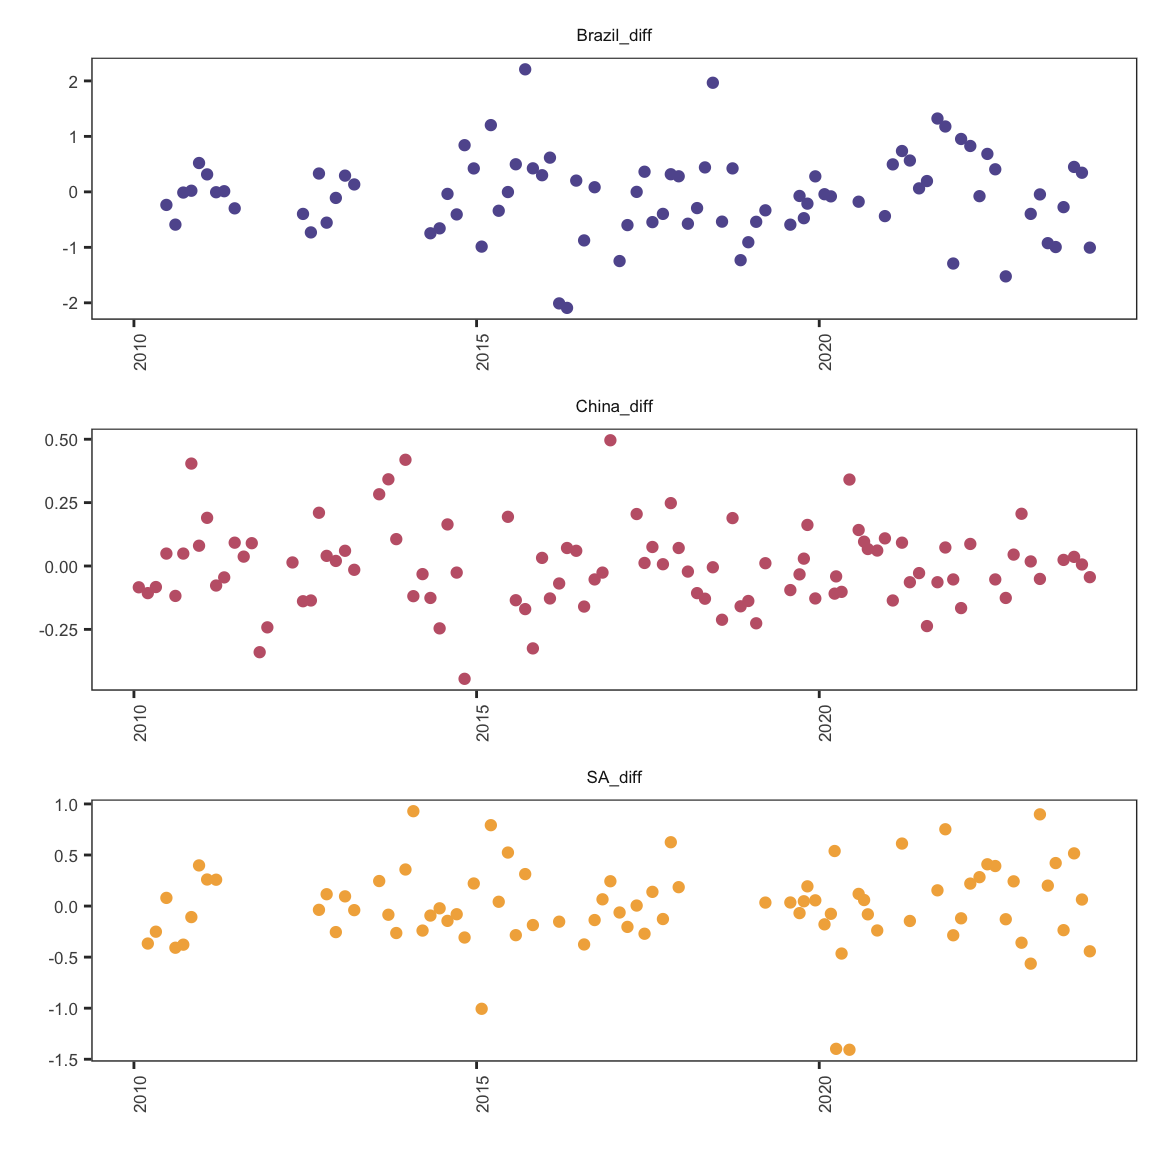

In [ ]:

announcement_days_gg <- 
  announcement_days_tbl |> 
  pivot_longer(cols = -Date, 
               names_to = "Series",
               values_to = "Value") |> 
  filter(Series %in% c("SA_diff", "Brazil_diff", "China_diff")) |> 
  # make scatter plot
  ggplot(aes(x = Date, y = Value, col = Series)) +
  geom_point() +
  facet_wrap(. ~ Series, 
              scale = "free", 
              labeller = label_parsed, 
             ncol = 1, 
             nrow = 3) +
  theme_bw() +
  theme(
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  theme(
    text = element_text(size = 8),
    strip.background = element_rect(colour = "white", fill = "white"),
    axis.text.x = element_text(angle = 90),
    axis.title = element_text(size = 7),
    plot.tag = element_text(size = 8)
  ) +
  labs(x = "", y = "") +
  scale_color_manual(values = pnw_palette("Sunset2", 3))

announcement_days_gg


Export:

In [ ]:
artifacts_announcement_days_data <- list (
  announcement_days_tbl = announcement_days_tbl,
  announcement_days_gg = announcement_days_gg
)

write_rds(artifacts_announcement_days_data, 
          file = here("notebooks", "outputs", "artifacts_announcement_days_data.rds"))
